#### npzファイルを用いて学習
#### 音声ファイルのプロパティを手動設定

In [119]:
import numpy as np
import keras
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *
import matplotlib.pyplot as plt

# from keras.models import Model
# from keras.layers import Input, Dense, Dropout, Activation
# from keras.layers import Conv2D, GlobalAveragePooling2D
# from keras.layers import BatchNormalization, Add
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.models import load_model

### dataset files

In [120]:
train_files = ["train_data_set_clean.npz",
               "train_data_set_whitenoise.npz",
               "train_data_set_soundshift.npz",
               "train_data_set_stretch.npz"]

test_file = "test_data_set.npz"

#### 各定数の設定

In [121]:
# 周波数を128に
freq = 128
time = 52

train_num = 187
test_num = 63

### define dataset placeholders

In [122]:
x_train = np.zeros(freq*time*train_num*len(train_files)).reshape(train_num*len(train_files), freq*time)
y_train = np.zeros(train_num*len(train_files))

# load dataset

In [123]:
for i in range(len(train_files)):
    data = np.load(train_files[i])
    x_train[i*train_num:(i+1)*train_num] = data["x"].reshape(train_num, freq*time)
    y_train[i*train_num:(i+1)*train_num] = data["y"]

x_train = x_train.reshape(train_num*len(train_files), freq * time)
print("x_train.shape:{}".format(x_train.shape))
print("y_train.shape:{}".format(y_train.shape))

x_train.shape:(748, 6656)
y_train.shape:(748,)


# load test dataset

In [124]:
test_data = np.load(test_file)
x_test = test_data["x"].reshape(len(test_data['x']), freq*time)
y_test = test_data["y"]
print("x_test shape : {0}\n{1}\n".format(x_test.shape, x_test))
print('-' * 32)
print("y_test shape : {0}\n{1}\n".format(y_test.shape, y_test))

x_test shape : (63, 6656)
[[ 0.87219715  0.79168916  0.54243648 ... -2.21233916 -2.03901458
  -1.87951589]
 [ 0.87004626  0.78579593  0.50210154 ... -2.27005959 -1.89627218
  -1.73677301]
 [ 1.03006339  0.95460749  0.727777   ... -2.30213022 -2.04399109
  -1.88449216]
 ...
 [ 0.82113159  0.72916079  0.4389292  ... -2.31144166 -1.93765414
  -1.77815485]
 [ 0.65483844  0.60671568  0.41501129 ... -1.91448259 -1.54069483
  -1.38119578]
 [ 0.75667346  0.70058954  0.52234435 ... -2.30459762 -2.30459762
  -2.28163743]]

--------------------------------
y_test shape : (63,)
[0. 2. 4. 1. 3. 3. 0. 1. 2. 0. 3. 1. 2. 4. 3. 2. 3. 1. 2. 4. 0. 4. 2. 0.
 1. 4. 3. 1. 0. 2. 0. 0. 3. 3. 3. 4. 4. 4. 1. 3. 4. 1. 2. 1. 1. 0. 3. 4.
 1. 1. 4. 2. 4. 0. 2. 3. 4. 2. 2. 0. 2. 0. 1.]



# one-hot表現に変更

In [125]:
classes = 5
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)

print("y_train shape:{}\n{}".format(y_train.shape, y_train))
print()
print("y_test shape:{}\n{}".format(y_test.shape, y_test))
# x_test = x_test.reshape(test_num, freq, time, 1)



y_train shape:(748, 5)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]

y_test shape:(63, 5)
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1.

In [126]:
print("x train:{0}\ny train:{1}\nx test:{2}\ny test:{3}".format(x_train.shape,
                                                                y_train.shape,
                                                                x_test.shape,
                                                                y_test.shape))

x train:(748, 6656)
y train:(748, 5)
x test:(63, 6656)
y test:(63, 5)


# chap6

In [127]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
# optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=freq*time, hidden_size_list=[100, 100, 100, 100],
        output_size=classes)
    train_loss[key] = []

#### 訓練の開始

In [128]:
train_size = x_train.shape[0]
batch_size = 32
max_iterations = 1000

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = y_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + "\t:" + str(loss))

===========iteration:0===========
SGD	:2.5018445001447924
Momentum	:13.540633128924892
AdaGrad	:13.599643189871081
Adam	:7.394332634234565
===========iteration:100===========
SGD	:0.905215635621926
Momentum	:1.6293197763950298
AdaGrad	:0.016902599850577897
Adam	:0.0010184618765900718
===========iteration:200===========
SGD	:0.714460192218495
Momentum	:1.6039164415894538
AdaGrad	:0.01517513873997518
Adam	:0.006548122657666758
===========iteration:300===========
SGD	:0.34087471213975673
Momentum	:1.6043505429265064
AdaGrad	:0.0293785605422926
Adam	:0.0018883932900084866
===========iteration:400===========
SGD	:0.3511673280044722
Momentum	:1.6166238331121905
AdaGrad	:0.009580825216885995
Adam	:0.0005300919443582107
===========iteration:500===========
SGD	:0.3073105413754773
Momentum	:1.606714781358812
AdaGrad	:0.04052771338263106
Adam	:0.0015407414388866445
===========iteration:600===========
SGD	:0.5425165088370594
Momentum	:1.611017728489538
AdaGrad	:0.003978180837997957
Adam	:0.0001172

#### グラフの描画

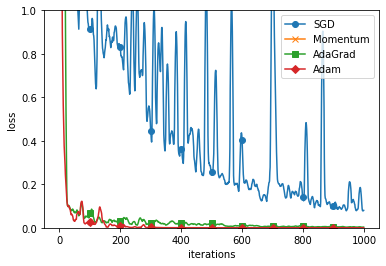

In [129]:
markers = {"SGD" : "o", "Momentum" : "x", "AdaGrad" : "s", "Adam" : "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()